# Image Classification of Handwritten Digits of the MNIST Dataset using Convolutional Neural Networks.
1.)Loading and Preparing the dataset.
2.)Defining the model.


In [1]:

from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
    
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')

	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# run the test harness for evaluating a model
def run_test_harness():
	
	trainX, trainY, testX, testY = load_dataset
	trainX, testX = prep_pixels(trainX, testX
	model = define_model()

	model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0)

	model.save('final_model.h5')


run_test_harness()

Using TensorFlow backend.


# Evaluating the model on the test dataset
Checking the percentage acuracy of model.

In [8]:

from keras.datasets import mnist
from keras.models import load_model
from keras.utils import to_categorical


def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))

	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

def prep_pixels(train, test):
	
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	
	return train_norm, test_norm


def run_test_harness():
	trainX, trainY, testX, testY = load_dataset()

	trainX, testX = prep_pixels(trainX, testX)

	model = load_model('final_model.h5')
	
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
    
    
run_test_harness()   

> 99.240


# Taking the sample Image of the digit 7 as input.
Reading the handwritten digit 7 from the MNIST Dataset.

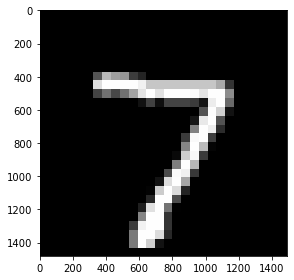

In [4]:
%matplotlib inline
import skimage.io as io
img= io.imread('/sample_image.png')
io.imshow(img)
io.show()

# Making prediction for a new test Image
Loading image and finally making predictions with the model.

In [5]:

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model


def load_image(filename):
	
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	
	img = img_to_array(img)
	
	img = img.reshape(1, 28, 28, 1)
	
	img = img.astype('float32')
	img = img / 255.0
	return img


def run_example():
	
	img = load_image('/sample_image.png')
	
	model = load_model('final_model.h5')
	
	digit = model.predict_classes(img)
	print(digit[0])


run_example()

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


7
